# Importing libraries

A computer program doesn't just know how do everything, if you want to calculate lets sy standard deviation, a computer doesn't know that unless a function has been already written. You can write the function yourself, but that just takes a lot of time. So you import a library that has that function that you need. 

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load The Data and Visualiize

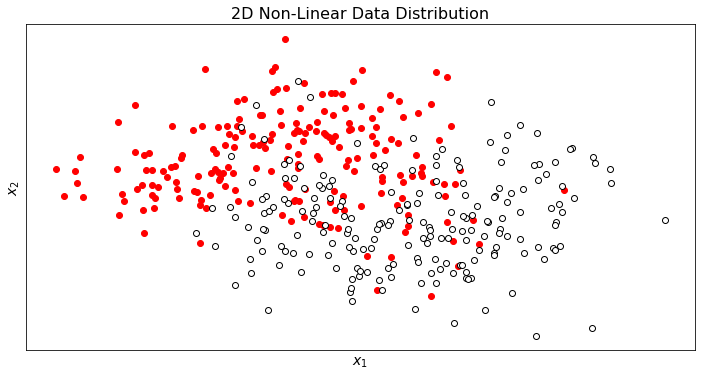

In [139]:
#Questions: What is X and y?
X, y = make_moons(n_samples=400, noise=0.50, random_state=0)

plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "ro")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "wo", markeredgecolor="k")

plt.title("2D Non-Linear Data Distribution", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

## What is X and y?

X are my features variables. In high school, you might know this as an independent variable. Depending on what you are analyzing, you are trying to find a relationship between how independent variables influences or interact with a dependent variable. For example, if you are trying to predict housing prices (the dependent variable), we might want to look at the square feet size of of a bunch of houses. Or we might want to look at more variables. In our case, we trying to predict whether the the points are red or white based on the x1 and x2 features (independent variable. 

# Creating Training and Test Dataset

Here, what we are going to do is take the entire X dataset, the entire y dataset, and split it into training and testing dataset. Just for convin

In [128]:
# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Note: (# of Rows, # of Columns)')
print('X Training Dataset: ', X_train.shape)
print('X Test Dataset:     ', X_test.shape)
print('y Training Dataset: ', y_train.shape)
print('y Test Dataset:     ', y_test.shape)

Note: (# of Rows, # of Columns)
X Training Dataset:  (320, 2)
X Test Dataset:      (80, 2)
y Training Dataset:  (320,)
y Test Dataset:      (80,)


In [144]:
#See what an individual looks like
X_test[0]

array([0.89025332, 1.37810169])

In [143]:
#REMOVE FOR PRESENTATION (Code this up on the spot)
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn.fit(X_train, y_train)

# Compute the prediction on a testing dataset
y_prediction = knn.predict(X_test)

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

print('Training Accuracy: ', train_accuracy * 100, '%')
print('Testing Accuracy:  ', test_accuracy * 100, '%')

Training Accuracy:  100.0 %
Testing Accuracy:   87.5 %


# Discussion: How do you figure out what is the best k value for the algorithm?

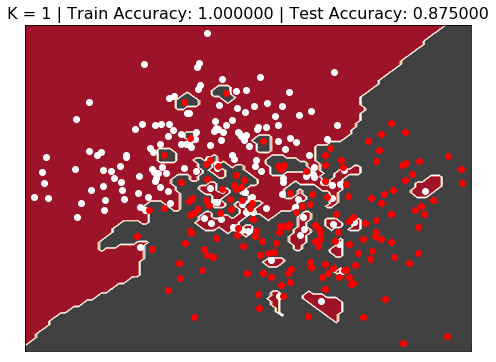

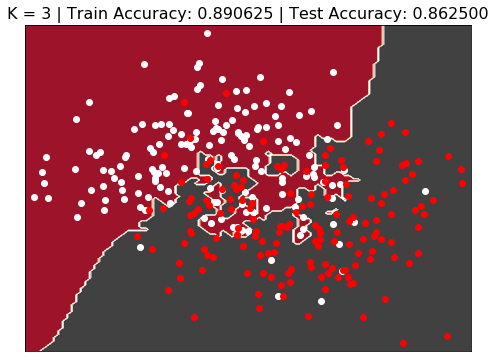

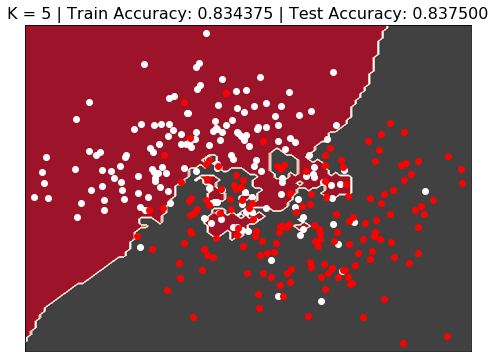

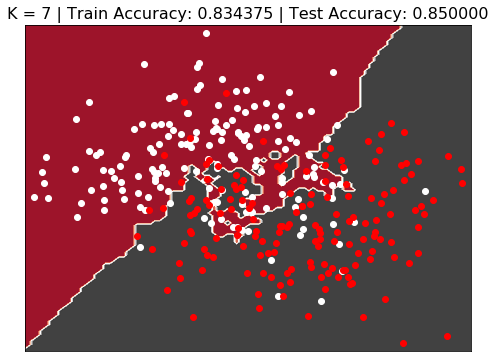

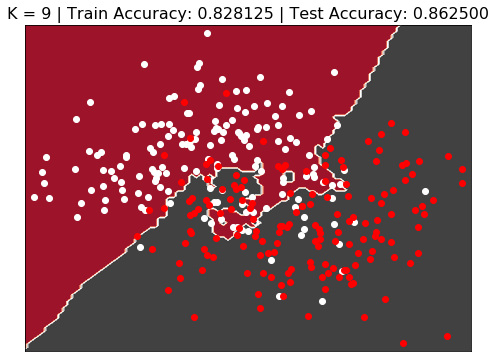

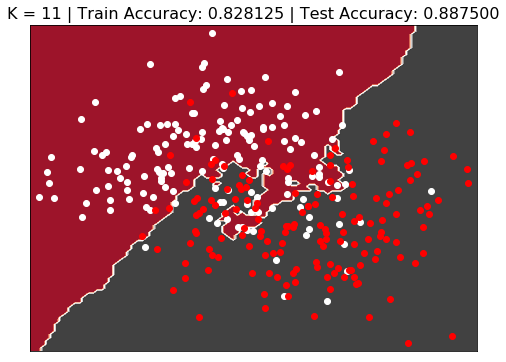

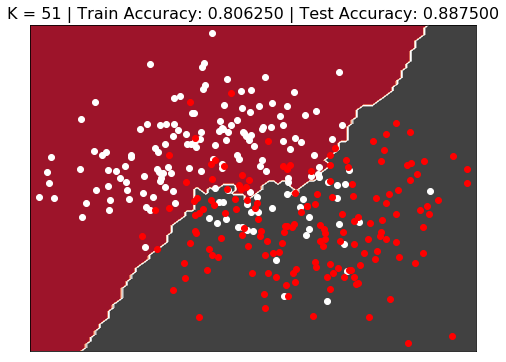

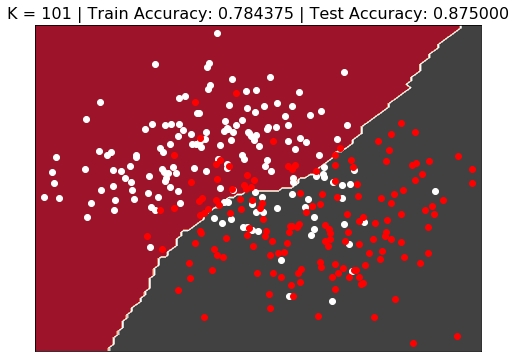

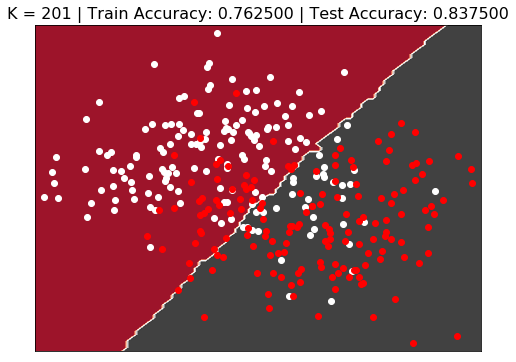

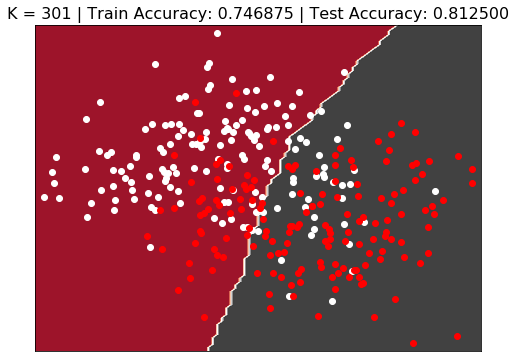

In [134]:
# Set the the range of K 
neighbors = [1, 3, 5, 7, 9, 11, 51, 101, 201, 301]


for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy = knn.score(X_test, y_test) 
    
    # Show the decision boundary only on the training data
    plt.figure(figsize=(8,6))
    decision_boundary_class_colored(knn, X_train, plotDistanceFromHyperplane=False)
    plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
    plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "ro")
    plt.title("K = %d | Train Accuracy: %f | Test Accuracy: %f"% 
              (k, train_accuracy, test_accuracy) , fontsize=16)
    plt.xticks(())
    plt.yticks(())



    plt.show()

# Observations

- What will happen if we set K to the size of our dataset?
- Discussion: Overfitting vs Underfitting

Notes:
Based on the decision boundaries created by various models, we make following observations:

K = 1: Training accuracy is the highest, but test accuracy is the lowest (severe overfitting). The decision boundary is very complex and highly non-linear.

As we increase K, the decision boundary becomes smooth and less complex. The training accuracy decreses but the test accuracy increases. The model becomes more generalizable.

K = all training data : all classifications become the same! The model simply assigns each test data to the most numerous class in the train data.
For finding optimal K (optimal model) in K-NN, we perform model selection via cross validation.

# Functions used in the code

In [ ]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    if(colorBar==True):
        plt.colorbar()

# Notes

Notes for KNN Algorithm

You can adjust the number of neighbors, the distance metric, these are called hyperparameter which are things you can adjust for the specific algorithm. Different machine learning algorithm has different hyperparameters

So what we just outlines is the brute force implementation of the algorithm. What is the first solution that comes to mind. However, computer sciencetist have come up with even better solutions 


Beginning
Lets begin with a motivating example. Lets say we have two classes of data, those that are smiley faces and those that are triangles. We want to be able to predict new points into these classification. 
What type of machine learning is this using the categories?
It is a supervise


Training accuracy vs Test Accuracy

Explaination for the KNN Algorithm
Take each individual point in X_train set, and you run euclidean distance with the single data point that you are trying to predict. After this process, you now have a list of distance that is unsort.